# Pencarian Solusi Diagonal Magic Cube dengan Local Search 🧐🔍
13522063 | Shazya Audrea Taufik

13522070 | Marzuli Suhada M

13522085 | Zahira Dina Amalia

13522108 | Muhammad Neo Cicero Koda

## Melakukan import library 📚

In [1]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Membentuk object magic cube 🎲

In [2]:
class MagicCube:
    def __init__(self, n, cube=None):
        self.n = n
        self.cube = cube if cube is not None else self.generate_random_cube()
        self.magic_number = self.calculate_magic_number()
        self.row_sums = np.sum(self.cube, axis=2)
        self.col_sums = np.sum(self.cube, axis=1)
        self.layer_sums = np.sum(self.cube, axis=0)

    def generate_random_cube(self):
        numbers = list(range(1, self.n**3 + 1))
        random.shuffle(numbers)
        cube = np.array(numbers).reshape(self.n, self.n, self.n)
        return cube

    def calculate_magic_number(self):
        return (self.n * (self.n**3 + 1)) // 2

    def swap(self, i1, j1, k1, i2, j2, k2):
        self.cube[i1, j1, k1], self.cube[i2, j2, k2] = self.cube[i2, j2, k2], self.cube[i1, j1, k1]
        self.update_sums(i1, j1, k1, i2, j2, k2)

    def update_sums(self, i1, j1, k1, i2, j2, k2):
        self.row_sums[i1, j1] = np.sum(self.cube[i1, j1, :])
        self.row_sums[i2, j2] = np.sum(self.cube[i2, j2, :])
        self.col_sums[i1, k1] = np.sum(self.cube[:, i1, k1])
        self.col_sums[i2, k2] = np.sum(self.cube[:, i2, k2])
        self.layer_sums[j1, k1] = np.sum(self.cube[i1, :, k1])
        self.layer_sums[j2, k2] = np.sum(self.cube[i2, :, k2])

    def calculate_objective_value(self):
        total_error = (np.abs(self.row_sums - self.magic_number).sum() +
                    np.abs(self.col_sums - self.magic_number).sum() +
                    np.abs(self.layer_sums - self.magic_number).sum())
        
        row_error_count = np.sum(np.abs(self.row_sums - self.magic_number) > 0)
        col_error_count = np.sum(np.abs(self.col_sums - self.magic_number) > 0)
        layer_error_count = np.sum(np.abs(self.layer_sums - self.magic_number) > 0)

        diagonal_error_count = 0

        for i in range(self.n):
            main_diagonal_sum = self.cube[i, range(self.n), range(self.n)].sum()
            anti_diagonal_sum = self.cube[i, range(self.n), range(self.n-1, -1, -1)].sum()
            vertical_diagonal_sum = self.cube[range(self.n), i, range(self.n)].sum()
            vertical_anti_diagonal_sum = self.cube[range(self.n), i, range(self.n-1, -1, -1)].sum()
            depth_diagonal_sum = self.cube[range(self.n), range(self.n), i].sum()
            depth_anti_diagonal_sum = self.cube[range(self.n), range(self.n-1, -1, -1), i].sum()

            main_diagonal_error = abs(main_diagonal_sum - self.magic_number)
            anti_diagonal_error = abs(anti_diagonal_sum - self.magic_number)
            vertical_diagonal_error = abs(vertical_diagonal_sum - self.magic_number)
            vertical_anti_diagonal_error = abs(vertical_anti_diagonal_sum - self.magic_number)
            depth_diagonal_error = abs(depth_diagonal_sum - self.magic_number)
            depth_anti_diagonal_error = abs(depth_anti_diagonal_sum - self.magic_number)

            if main_diagonal_error > 0:
                total_error += main_diagonal_error
                diagonal_error_count += 1
                
            if anti_diagonal_error > 0:
                total_error += anti_diagonal_error
                diagonal_error_count += 1
                
            if vertical_diagonal_error > 0:
                total_error += vertical_diagonal_error
                diagonal_error_count += 1
                
            if vertical_anti_diagonal_error > 0:
                total_error += vertical_anti_diagonal_error
                diagonal_error_count += 1
                
            if depth_diagonal_error > 0:
                total_error += depth_diagonal_error
                diagonal_error_count += 1
                
            if depth_anti_diagonal_error > 0:
                total_error += depth_anti_diagonal_error
                diagonal_error_count += 1

        ruang_diagonals = [
            self.cube[range(self.n), range(self.n), range(self.n)].sum(),
            self.cube[range(self.n), range(self.n), range(self.n-1, -1, -1)].sum(),
            self.cube[range(self.n), range(self.n-1, -1, -1), range(self.n)].sum(),
            self.cube[range(self.n), range(self.n-1, -1, -1), range(self.n-1, -1, -1)].sum()
        ]

        ruang_error_count = 0
        for ruang_diagonal_sum in ruang_diagonals:
            ruang_error = abs(ruang_diagonal_sum - self.magic_number)
            if ruang_error > 0:
                total_error += ruang_error
                ruang_error_count += 1

        total_error_count = row_error_count + col_error_count + layer_error_count + diagonal_error_count + ruang_error_count

        return total_error, total_error_count
    
    def copy(self):
        new_cube = MagicCube(self.n, np.copy(self.cube))
        new_cube.row_sums = np.copy(self.row_sums)
        new_cube.col_sums = np.copy(self.col_sums)
        new_cube.layer_sums = np.copy(self.layer_sums)
        return new_cube
    
    def fitness(self):
        total_error, _ = self.calculate_objective_value()
        return 1 / (1 + total_error)

## Visualisasi 📊

In [3]:
def show_cube(cube_data):
    fig = plt.figure(figsize=(20, 50))
    ax = fig.add_subplot(111, projection='3d')

    if isinstance(cube_data, MagicCube):
        cube = cube_data.cube
    else:
        cube = cube_data

    n = cube.shape[0]
    cube_size = 1.0
    layer_spacing = 120.0  
    cube_height = 40.0 

    colors = ['#ffcccc', '#cce5ff', '#ccffcc', '#ffe6cc', '#e6e6fa']

    for z in range(n):
        for y in range(n):
            for x in range(n):
                x_pos, y_pos, z_pos = x, y, z * layer_spacing + cube_height
                face_color = colors[z % len(colors)]

                ax.bar3d(x_pos, y_pos, z_pos, cube_size, cube_size, cube_height, color=face_color, alpha=0.15)
                
                ax.text(x_pos + cube_size / 2, y_pos + cube_size / 2, z_pos + cube_height/2, 
                        str(cube[z, y, x]), ha='center', va='center', color="black", fontsize=6, weight='bold', 
                        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Layer (Z)')
    ax.set_xlim(-0.5, n - 0.5)
    ax.set_ylim(-0.5, n - 0.5)
    ax.set_zlim(-0.5, n * layer_spacing + cube_height)

    ax.view_init(elev=20, azim=30)

    plt.title("3D Visualization of The Magic Cube")
    plt.show()

## Implementasi Algoritma 🏄‍♀️

### Algoritma Simulated Annealing 🌡️

In [4]:
class SimulatedAnnealing:
    def __init__(self, initial_cube, initial_temperature, cooling_rate, stopping_temperature, tolerance):
        self.cube = initial_cube
        self.current_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.stopping_temperature = stopping_temperature
        self.tolerance = tolerance
        self.objective_history = []
        self.probability_history = []
        self.stuck_count = 0
        self.initial_state = np.copy(initial_cube.cube)
        self.initial_objective_value = initial_cube.calculate_objective_value()
        self.iteration = 0  # Track iterations for plotting

    def acceptance_probability(self, old_cost, new_cost):
        old_total_error = old_cost[0]
        new_total_error = new_cost[0]
        
        if new_total_error < old_total_error:
            return 1.0
        else:
            return math.exp((old_total_error - new_total_error) / self.current_temperature)

    def get_neighbor(self):
        i1, j1, k1 = random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1)
        i2, j2, k2 = random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1)
        neighbor = self.cube.copy()
        neighbor.swap(i1, j1, k1, i2, j2, k2)
        return neighbor

    def anneal(self):
        start_time = time.time()
        
        current_solution = self.cube
        current_cost = current_solution.calculate_objective_value()
        best_solution = current_solution
        best_cost = current_cost

        while self.current_temperature > self.stopping_temperature:
            neighbor = self.get_neighbor()
            new_cost = neighbor.calculate_objective_value()

            acceptance_prob = self.acceptance_probability(current_cost, new_cost)

            # Only record data every 100 iterations for plotting
            if self.iteration % 100 == 0:
                self.objective_history.append(current_cost[1])
                self.probability_history.append(acceptance_prob)

            if acceptance_prob == 1 or acceptance_prob > random.uniform(0, 1):
                current_solution = neighbor
                current_cost = new_cost
            else:
                self.stuck_count += 1

            if new_cost[1] < best_cost[1] or (new_cost[1] == best_cost[1] and new_cost[0] < best_cost[0]):
                best_solution = neighbor
                current_cost = new_cost
                best_cost = new_cost

            self.current_temperature *= self.cooling_rate
            self.iteration += 1  # Increment the iteration counter

            if best_cost[1] <= self.tolerance:
                break

        end_time = time.time()
        duration = end_time - start_time
        self.final_state = np.copy(best_solution.cube)
        final_objective_value = best_solution.calculate_objective_value()

        show_cube(best_solution)
        print(f"\nFinal Objective Function Value (total_error, error_count): {final_objective_value}")
        print(f"Duration: {duration:.2f} seconds")
        print(f"Frequency of being 'stuck' at local optima: {self.stuck_count}")
        
        self.plot_results(duration, best_cost[1])
        
        return best_solution, best_cost, duration

    def plot_results(self, duration, best_cost):
        plt.figure(figsize=(12, 5))
        plt.plot(range(0, self.iteration, 100), self.objective_history, label='Objective Value (total_error)')
        plt.xlabel("Iterations (every 100)")
        plt.ylabel("Objective Value")
        plt.title("Objective Function Over Iterations (every 100)")
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 5))
        plt.plot(range(0, self.iteration, 100), self.probability_history, label='Acceptance Probability (e^ΔE/T)')
        plt.xlabel("Iterations (every 100)")
        plt.ylabel("Acceptance Probability")
        plt.title("Acceptance Probability Over Iterations (every 100)")
        plt.legend()
        plt.show()

### Genetic Algorithm 🪢

In [5]:
class GeneticAlgorithm:
    def __init__(self, cube_size, population_size, max_iterations):
        self.cube_size = cube_size
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.population = [MagicCube(cube_size) for _ in range(population_size)]
        self.objective_log = []
        self.objective_values_log = []  # Log for objective values

    def run(self):
        start_time = time.time()
        initial_cube = self.population[0].cube.copy()
        
        for iteration in range(self.max_iterations):
            # Fitness values for selection
            fitness_values = [cube.fitness() for cube in self.population]
            max_fitness = max(fitness_values)
            avg_fitness = sum(fitness_values) / len(fitness_values)
            self.objective_log.append((iteration, max_fitness, avg_fitness))
            
            # Objective values for plotting
            objective_values = [cube.calculate_objective_value()[0] for cube in self.population]
            max_objective = max(objective_values)
            avg_objective = sum(objective_values) / len(objective_values)
            self.objective_values_log.append((iteration, max_objective, avg_objective))

            # Perform selection, crossover, and mutation
            self.population = self.selection(fitness_values)
            self.population = self.crossover_and_mutate(self.population)

        end_time = time.time()
        final_cube = self.population[0].cube

        # Show the final cube and print summary
        show_cube(final_cube)
        print("Final Objective Value:", self.population[0].calculate_objective_value())
        print("Population Size:", self.population_size)
        print("Iterations:", self.max_iterations)
        print("Duration:", end_time - start_time, "seconds")
        
        self.plot_fitness_values()
        self.plot_objective_values()

    def plot_fitness_values(self):
        iterations, max_values, avg_values = zip(*self.objective_log)
        
        plt.figure(figsize=(10, 5))
        plt.plot(iterations, max_values, label='Max Fitness Value', marker='o')
        plt.plot(iterations, avg_values, label='Average Fitness Value', marker='x')
        plt.title('Fitness Values Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Fitness Value')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_objective_values(self):
        iterations, max_objectives, avg_objectives = zip(*self.objective_values_log)
        
        plt.figure(figsize=(10, 5))
        plt.plot(iterations, max_objectives, label='Max Objective Value', marker='o')
        plt.plot(iterations, avg_objectives, label='Average Objective Value', marker='x')
        plt.title('Objective Values Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Objective Value')
        plt.legend()
        plt.grid(True)
        plt.show()

    def selection(self, fitness_values):
        selected_population = sorted(self.population, key=lambda cube: cube.fitness(), reverse=True)
        return selected_population[:self.population_size // 2]

    def crossover_and_mutate(self, selected_population):
        new_population = []
        for _ in range(self.population_size):
            parent1, parent2 = random.sample(selected_population, 2)
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)
        return new_population

    def crossover(self, parent1, parent2):
        child_cube = np.copy(parent1.cube)
        for i in range(self.cube_size):
            for j in range(self.cube_size):
                for k in range(self.cube_size):
                    if random.random() < 0.5:
                        child_cube[i, j, k] = parent2.cube[i, j, k]
        return MagicCube(self.cube_size, child_cube)

    def mutate(self, cube):
        i1, j1, k1 = random.randint(0, self.cube_size - 1), random.randint(0, self.cube_size - 1), random.randint(0, self.cube_size - 1)
        i2, j2, k2 = random.randint(0, self.cube_size - 1), random.randint(0, self.cube_size - 1), random.randint(0, self.cube_size - 1)
        cube.swap(i1, j1, k1, i2, j2, k2)

### Algoritma Sideways Move Hill Climbing 🏋️

In [6]:
class SidewaysMove:
    def __init__(self, initial_cube, max_sideways):
        self.cube = initial_cube
        self.max_sideways = max_sideways
        self.objective_history = []

    def get_neighbor(self):
        best_neighbor = None
        _, best_error_count = self.cube.calculate_objective_value()

        for i1 in range(self.cube.n):
            for j1 in range(self.cube.n):
                for k1 in range(self.cube.n):
                    for i2 in range(self.cube.n):
                        for j2 in range(self.cube.n):
                            for k2 in range(self.cube.n):
                                if (i1, j1, k1) != (i2, j2, k2):
                                    neighbor = self.cube.copy()
                                    neighbor.swap(i1, j1, k1, i2, j2, k2)

                                    _, neighbor_error_count = neighbor.calculate_objective_value()

                                    if neighbor_error_count <= best_error_count:
                                        best_neighbor = neighbor
                                        best_error_count = neighbor_error_count          

        return best_neighbor
    

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.plot(self.objective_history, label='Objective Value (total_error)')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Value")
        plt.title("Objective Function Over Iterations")
        plt.legend()
        plt.show()

    def hill_climb(self):
        start_time = time.time()
        i = 0
        n_sideways = 0
        
        while True:
            best_cost, best_error_count = self.cube.calculate_objective_value()
            self.objective_history.append(best_error_count)
            
            neighbor = self.get_neighbor()

            if not neighbor:
                break

            neighbor_cost, neighbor_error_count = neighbor.calculate_objective_value()

            if neighbor_error_count > best_error_count:
                break
            elif neighbor_error_count == best_error_count:
                n_sideways += 1
                if n_sideways >= self.max_sideways:
                    break
            else:
                n_sideways = 0

            self.cube = neighbor
            i += 1

        print(f"Jumlah iterasi: {i}")

        end_time = time.time()
        duration = end_time - start_time
        final_cost, final_error_count = self.cube.calculate_objective_value()
        self.plot_results()
        return self.cube, final_cost, final_error_count, duration

### Algoritma Stochastic Hill Climbing 🎱

In [7]:
class Stochastic:
    def __init__(self, initial_cube, max_iteration=50000):
        self.cube = initial_cube
        self.max_iteration = max_iteration
        self.objective_history = []
        
    def get_random_neighbor(self):
        i1, j1, k1 = random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1)
        i2, j2, k2 = random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1)
 
        while (i1, j1, k1) == (i2, j2, k2):
            i2, j2, k2 = random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1), random.randint(0, self.cube.n - 1)

        neighbor = self.cube.copy()
        neighbor.swap(i1, j1, k1, i2, j2, k2)
        return neighbor
    
    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.plot(self.objective_history, label='Objective Value (total_error)')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Value")
        plt.title("Objective Function Over Iterations")
        plt.legend()
        plt.show()

    def hill_climb(self):
        start_time = time.time()
        iteration = 0

        while iteration < self.max_iteration:
            current_cost = self.cube.calculate_objective_value()
            self.objective_history.append(current_cost[1])
            # print(f"Current Cost: {current_cost}, Iteration: {iteration}")
            
            neighbor = self.get_random_neighbor()
            neighbor_cost = neighbor.calculate_objective_value()

            # print(f"Neighbor Cost: {neighbor_cost}")

            if neighbor_cost < current_cost:
                self.cube = neighbor  
            
            iteration += 1
        
        print(f"Jumlah iterasi: {iteration}")

        end_time = time.time()
        duration = end_time - start_time
        self.plot_results()
        return self.cube, self.cube.calculate_objective_value()[0], self.cube.calculate_objective_value()[1], duration, iteration

### Algoritma Steepest Ascent Hill Climbing 🧗‍♂️

In [8]:
class SteepestAscent:
    def __init__(self, initial_cube):
        self.cube = initial_cube
        self.objective_history = []

    def get_neighbor(self):
        best_neighbor = None
        best_cost, best_error_count = self.cube.calculate_objective_value()

        for i1 in range(self.cube.n):
            for j1 in range(self.cube.n):
                for k1 in range(self.cube.n):
                    for i2 in range(self.cube.n):
                        for j2 in range(self.cube.n):
                            for k2 in range(self.cube.n):
                                if (i1, j1, k1) != (i2, j2, k2):
                                    neighbor = self.cube.copy()
                                    neighbor.swap(i1, j1, k1, i2, j2, k2)

                                    neighbor_cost, neighbor_error_count = neighbor.calculate_objective_value()

                                    if neighbor_error_count < best_error_count:
                                        best_neighbor = neighbor
                                        best_cost = neighbor_cost
                                        best_error_count = neighbor_error_count
                                    elif neighbor_error_count == best_error_count and neighbor_cost < best_cost:
                                        best_neighbor = neighbor
                                        best_cost = neighbor_cost                                    
        return best_neighbor
    
    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.plot(self.objective_history, label='Objective Value (total_error)')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Value")
        plt.title("Objective Function Over Iterations")
        plt.legend()
        plt.show()

    def hill_climb(self):
        start_time = time.time()
        i = 0
        while True:
            best_cost, best_error_count = self.cube.calculate_objective_value()
            self.objective_history.append(best_error_count)

            neighbor = self.get_neighbor()
            if not neighbor or (neighbor.calculate_objective_value()[0] >= best_cost and neighbor.calculate_objective_value()[1] >= best_error_count):
                break
            
            self.cube = neighbor
            i += 1

        print(f"Jumlah iterasi: {i}")

        end_time = time.time()
        duration = end_time - start_time
        final_cost, final_error_count = self.cube.calculate_objective_value()
        self.plot_results()
        return self.cube, final_cost, final_error_count, duration

### Algoritma Random Restart Hill Climbing 🤹‍♂️

In [9]:
class RandomRestart:
    def __init__(self, n_restarts=10, max_iteration=3000):
        self.n_restarts = n_restarts
        self.max_iteration = max_iteration
        self.objective_history = []

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.plot(self.objective_history, label='Objective Value (total_error)')
        plt.xlabel("Iterations")
        plt.ylabel("Objective Value")
        plt.title("Objective Function Over Iterations")
        plt.legend()
        plt.show()

    def hill_climb(self):
        best_solution = None
        best_cost = float('inf')
        best_error_count = float('inf')
        total_duration = 0

        for restart in range(self.n_restarts):
            # print(f"\nRandom Restart {restart + 1}/{self.n_restarts}")
            initial_cube = MagicCube(5)
            shc = Stochastic(initial_cube, max_iteration=self.max_iteration)

            solution, cost, error_count, duration, iteration = shc.hill_climb()
            total_duration += duration

            if error_count < best_error_count or (error_count == best_error_count and cost < best_cost):
                best_solution = solution
                best_cost = cost
                best_error_count = error_count

            # print(f"Restart {restart + 1}: Cost = {cost}, Error Count = {error_count}, Duration = {duration} seconds")
            self.objective_history.append(error_count)
            print(f"Jumlah iterasi restart {restart + 1}: {iteration}")
        print(f"Jumlah restart: {self.n_restarts}")
        self.plot_results()
        return best_solution, best_cost, best_error_count, total_duration

## Run 🏃‍♂️🏃‍♀️

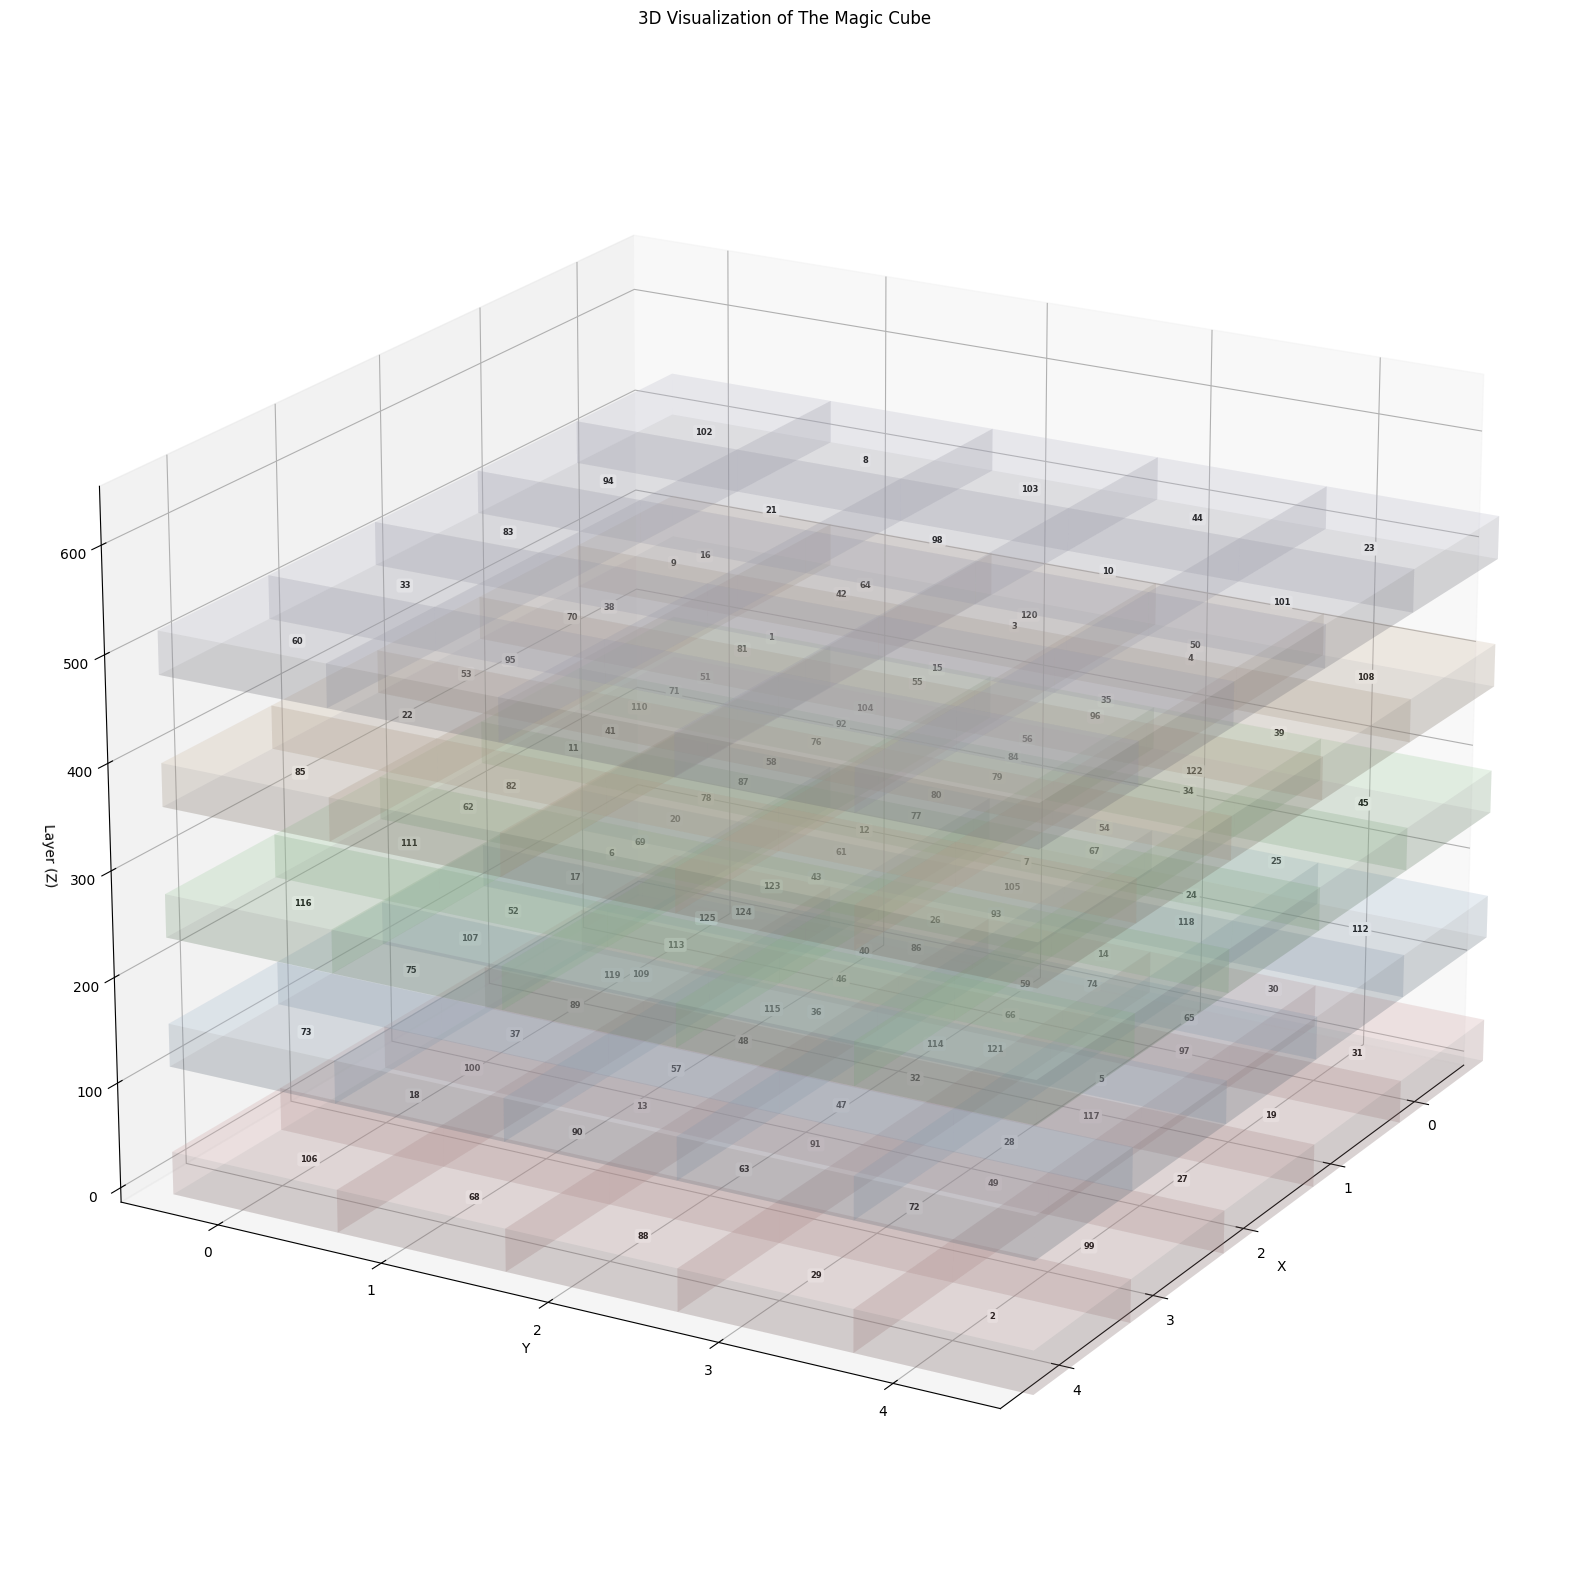

Initial Objective Function Value (total_error, error_count): (6959, 108)



In [10]:
n = 5

initial_cube = MagicCube(n)
show_cube(initial_cube)
print(f"Initial Objective Function Value (total_error, error_count): {initial_cube.calculate_objective_value()}\n")

### Run Simulated Annealing

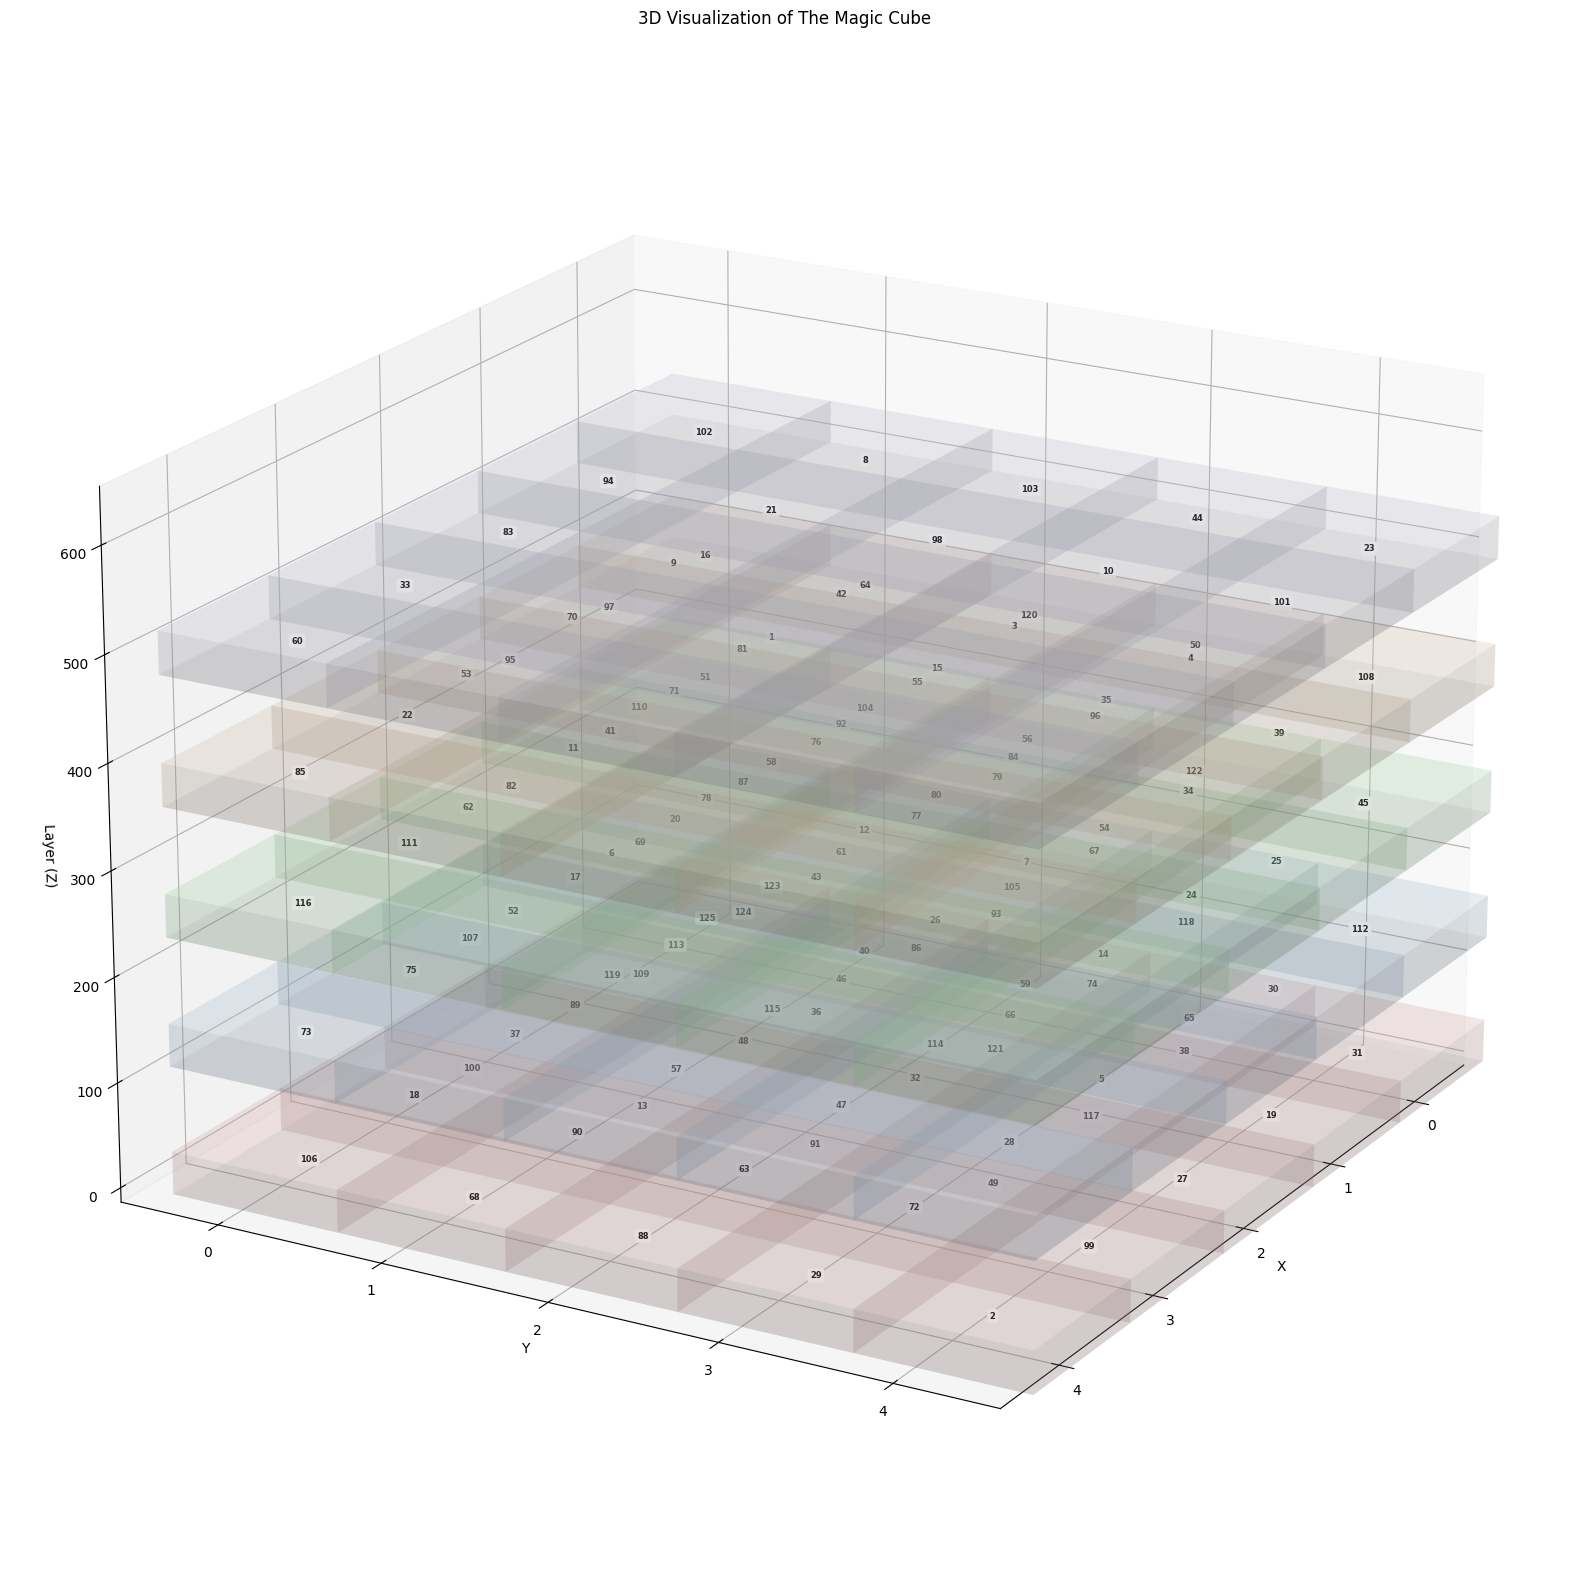


Final Objective Function Value (total_error, error_count): (6972, 106)
Duration: 0.39 seconds
Frequency of being 'stuck' at local optima: 2167


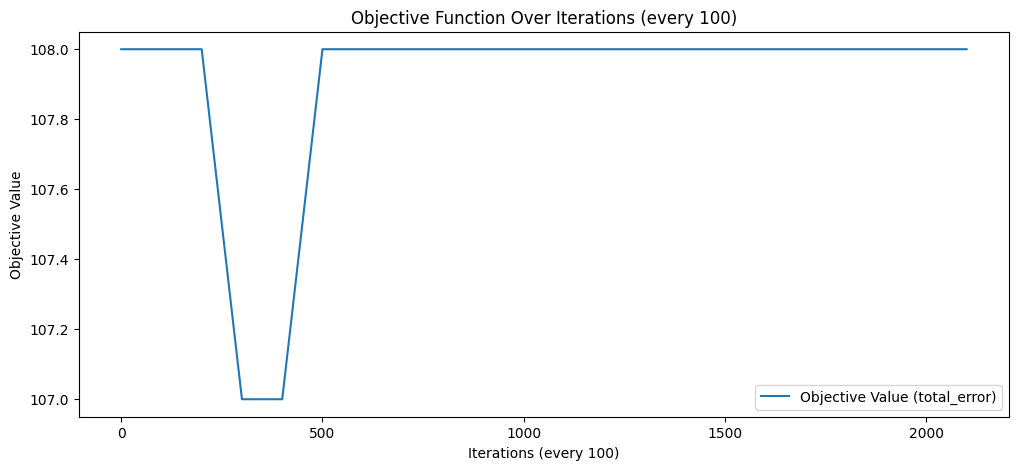

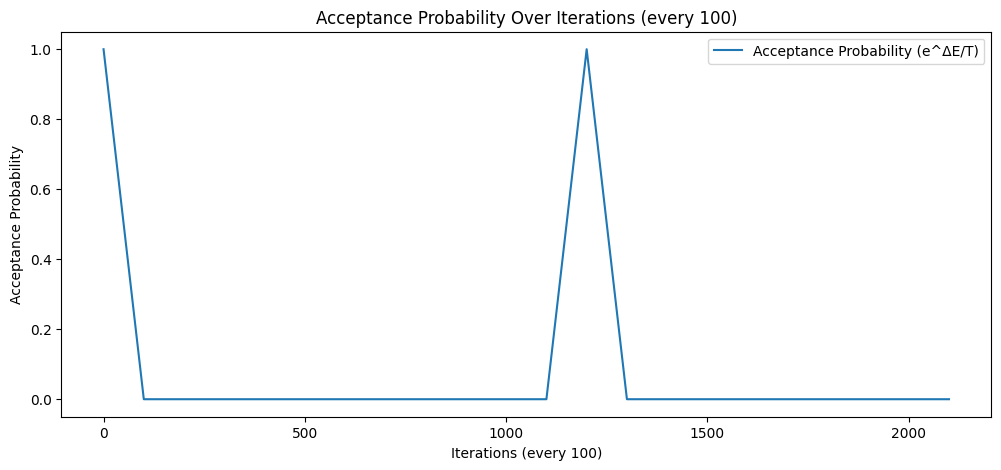

(<__main__.MagicCube at 0x10e773740>, (6972, 106), 0.38871097564697266)

In [11]:
def run_simulating_annealing(initial_cube, initial_temperature, cooling_rate, stopping_temperature, tolerance):
    sa = SimulatedAnnealing(initial_cube, initial_temperature, cooling_rate, stopping_temperature, tolerance)
    best_solution, best_cost, duration = sa.anneal()
    return best_solution, best_cost, duration

initial_temperature = 1
cooling_rate = 0.90
stopping_temperature = 1e-100
tolerance = 0

run_simulating_annealing(initial_cube, initial_temperature, cooling_rate, stopping_temperature, tolerance)

### Run Genetic Algorithm

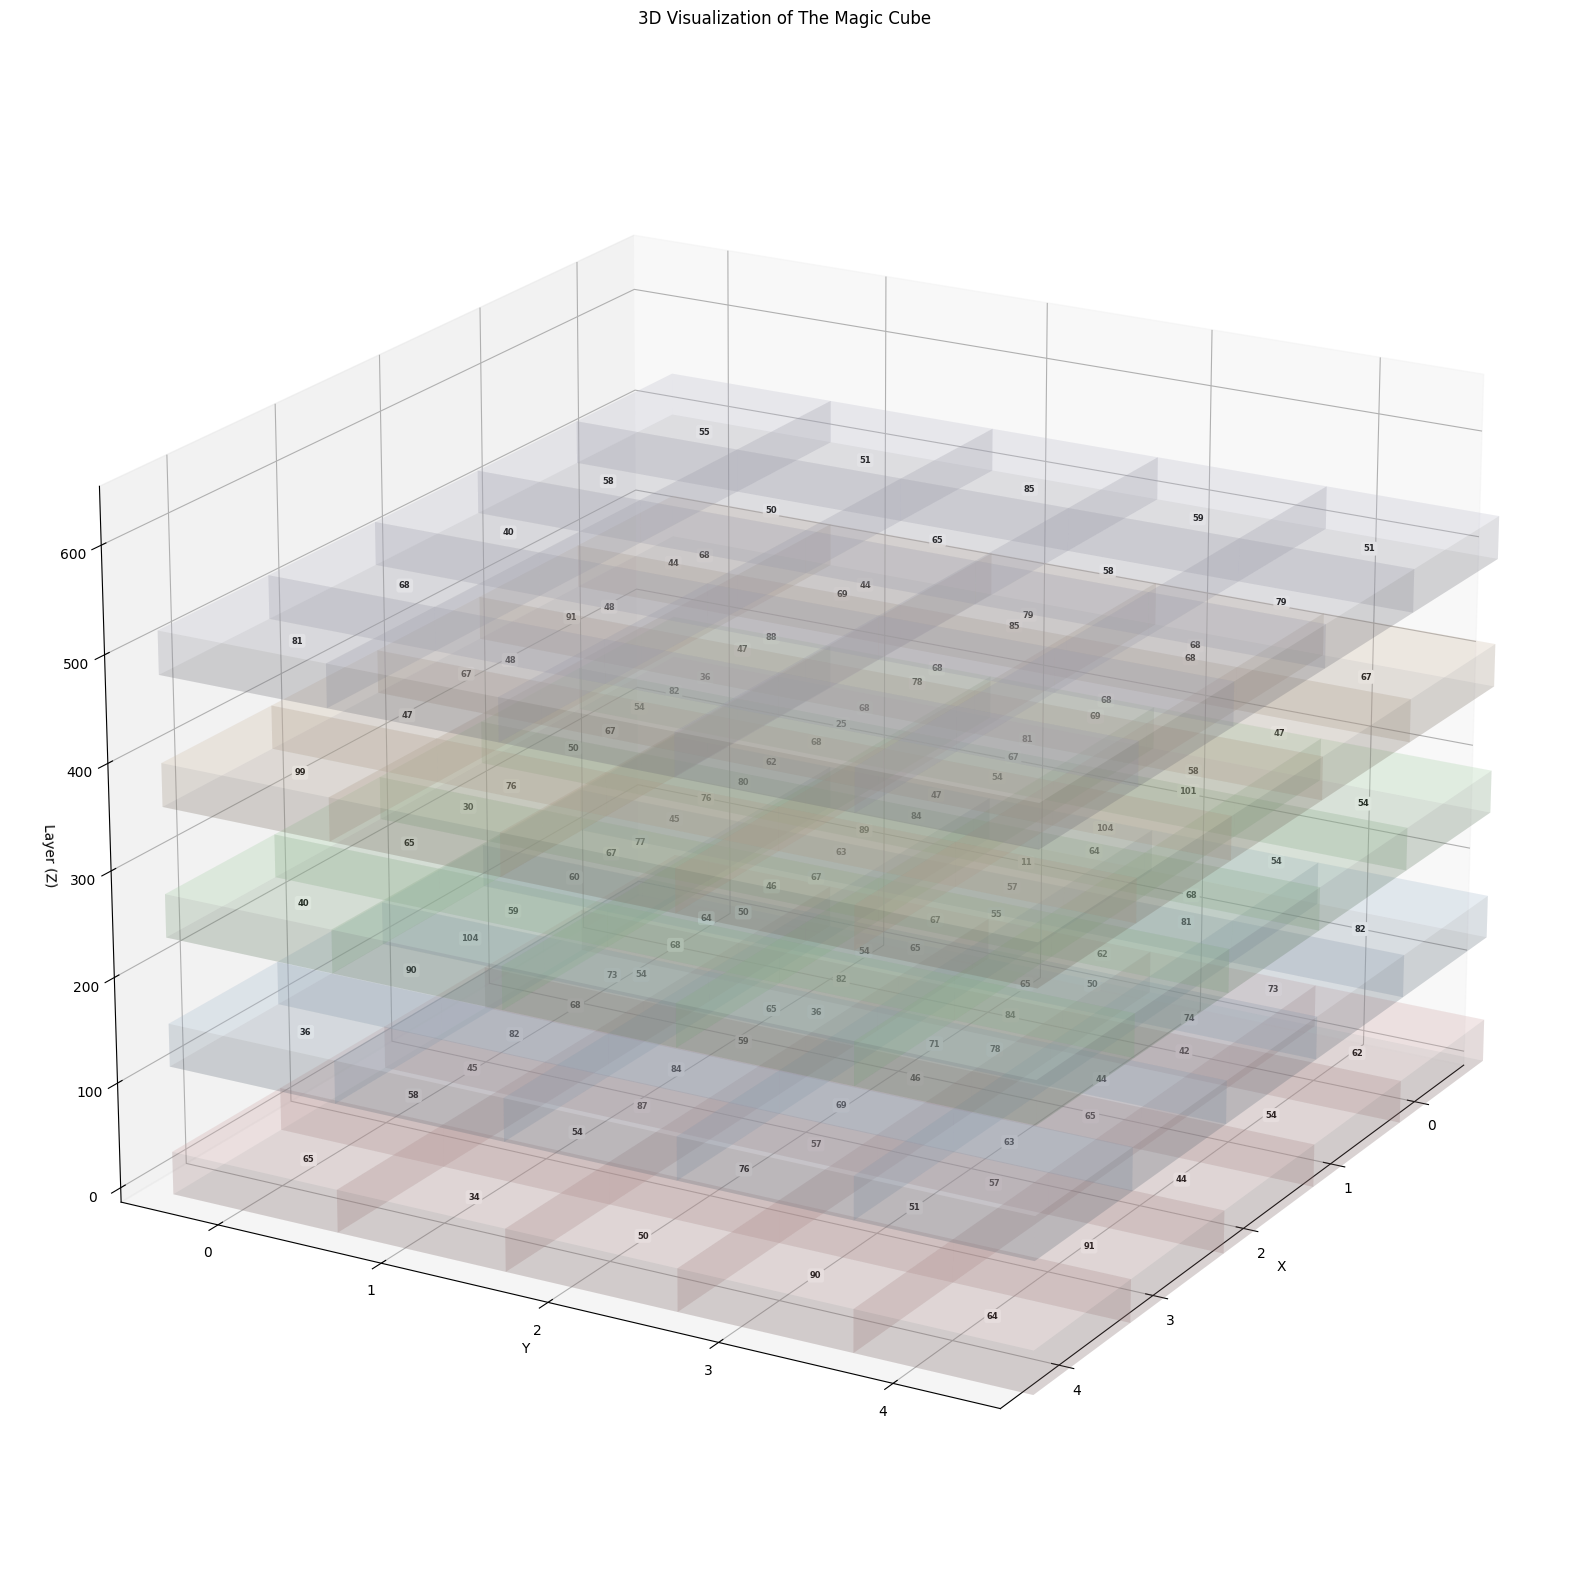

Final Objective Value: (1461, 106)
Population Size: 100
Iterations: 100
Duration: 5.081791162490845 seconds


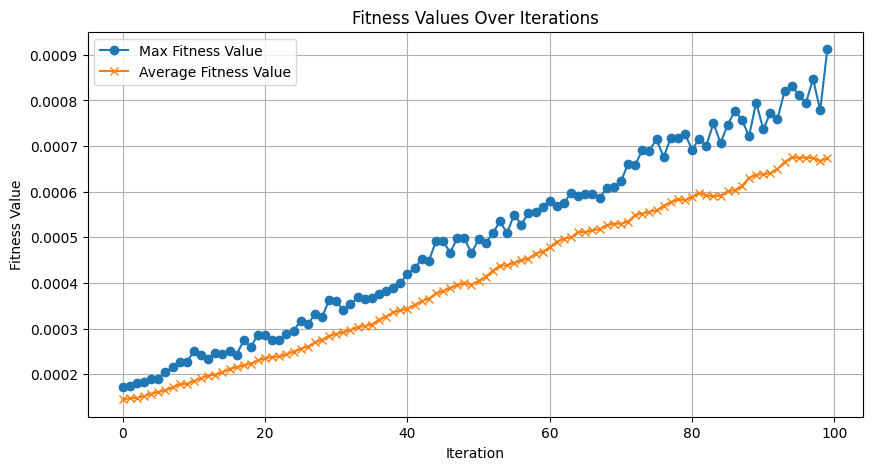

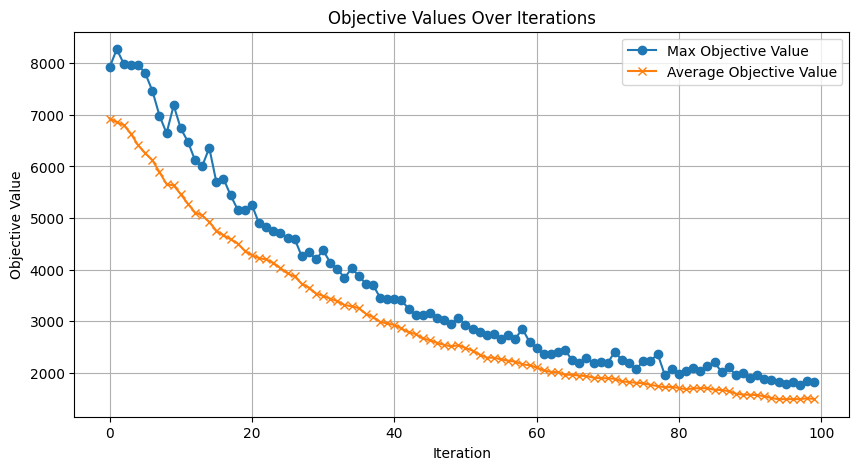

In [12]:
population_size = 100
max_iterations = 100

ga = GeneticAlgorithm(n, population_size, max_iterations)
ga.run()

### Run Sideways Move Hill Climbing

Jumlah iterasi: 26


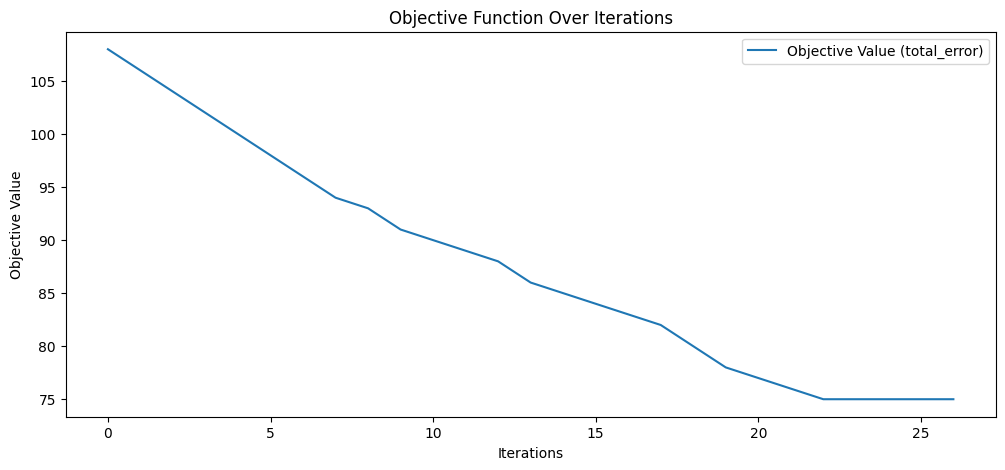

Optimized Cube:


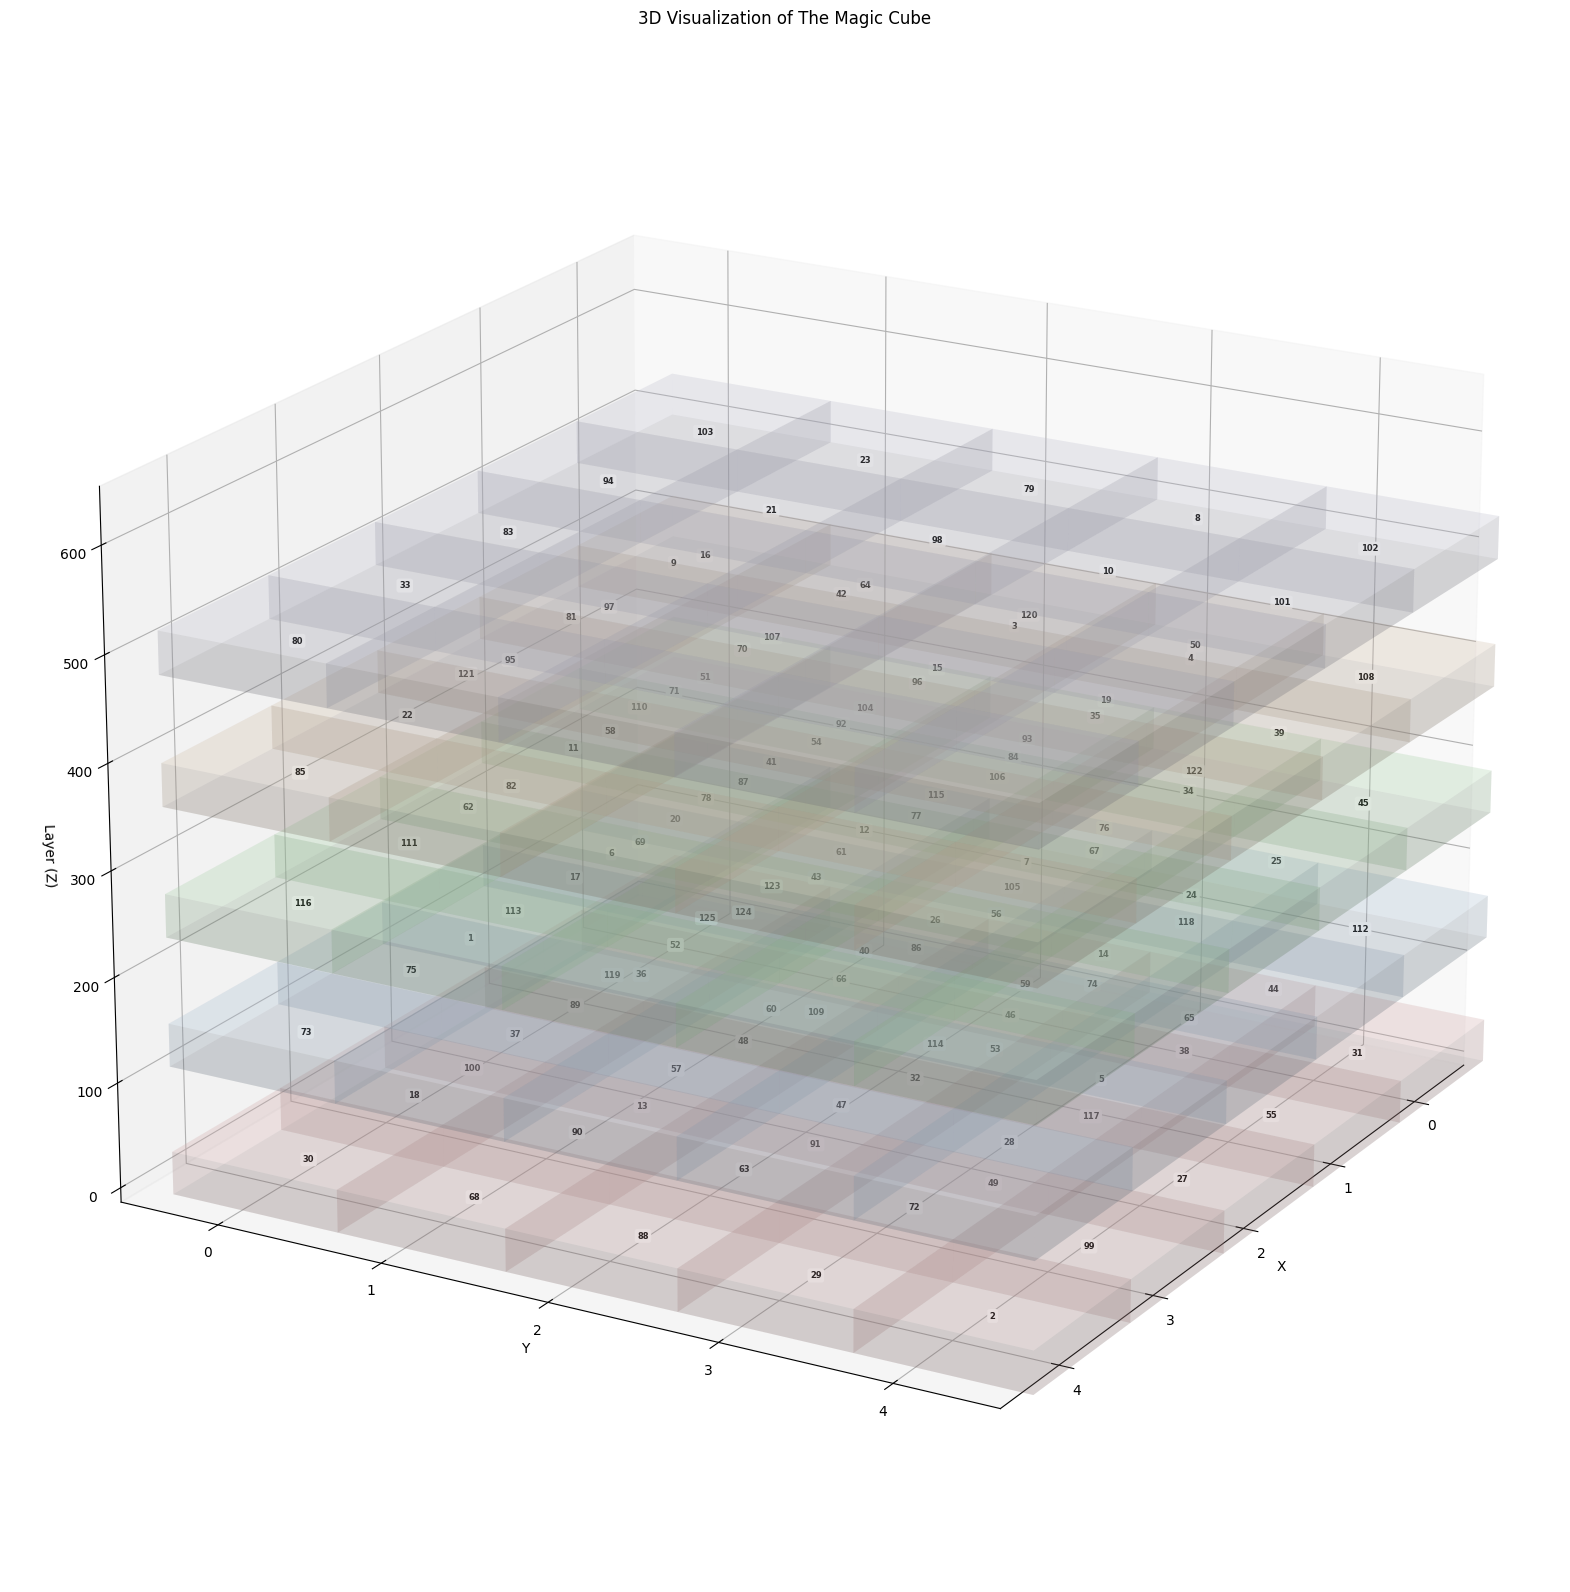

Best Cost: (5064, 75)
Duration: 72.54 seconds


In [13]:
def run_sideways_move(n, cube):
    initial_cube = MagicCube(n, cube=cube.cube)
    smhc = SidewaysMove(initial_cube, 5)
    best_solution, best_cost, best_error_count, total_duration = smhc.hill_climb()
    return best_solution, (best_cost, best_error_count), total_duration

best_solution, best_cost, duration = run_sideways_move(n, initial_cube)
print("Optimized Cube:")
show_cube(best_solution.cube)
print(f"Best Cost: {best_cost}")
print(f"Duration: {duration:.2f} seconds")

### Run Stochastic Hill Climbing

Jumlah iterasi: 50000


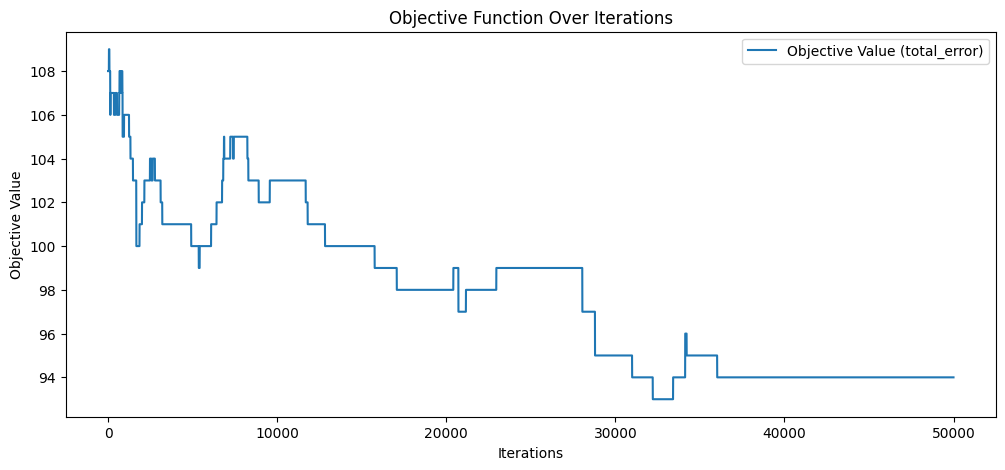

Optimized Cube:


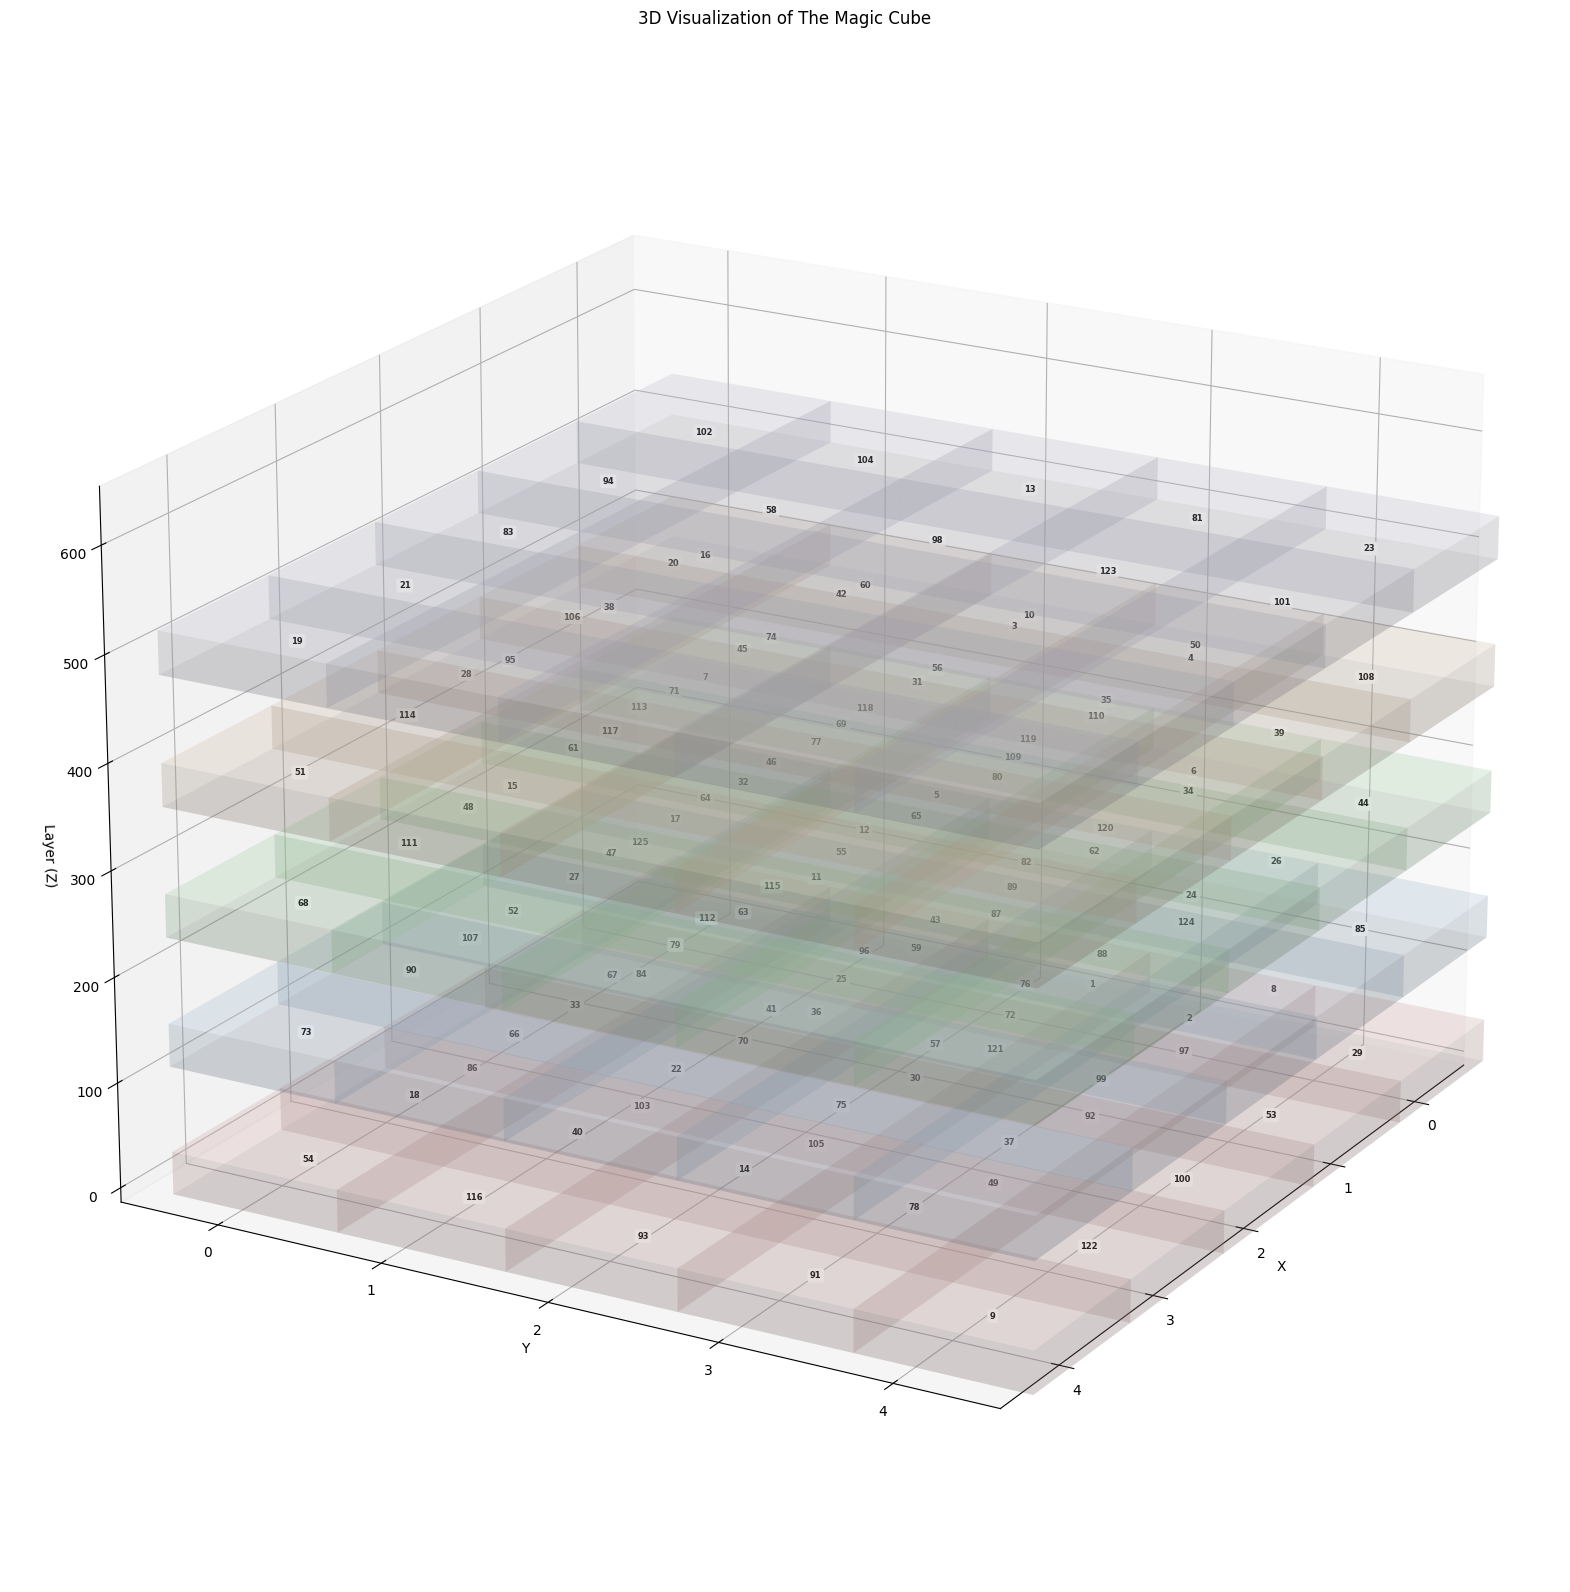

Best Cost: (1728, 94)
Duration: 16.66 seconds


In [14]:
def run_stochastic(n, cube):
    initial_cube = MagicCube(n, cube=cube.cube)
    shc = Stochastic(initial_cube)
    best_solution, best_cost, best_error_count, total_duration, _ = shc.hill_climb()
    return best_solution, (best_cost, best_error_count), total_duration

best_solution, best_cost, duration = run_stochastic(n, initial_cube)
print("Optimized Cube:")
show_cube(best_solution.cube)
print(f"Best Cost: {best_cost}")
print(f"Duration: {duration:.2f} seconds")

### Run Steepest Ascent

Jumlah iterasi: 46


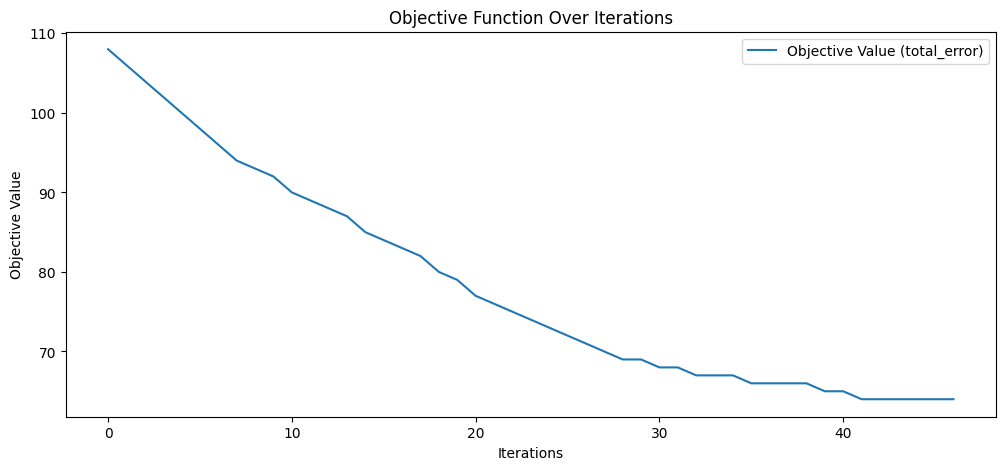

Optimized Cube:


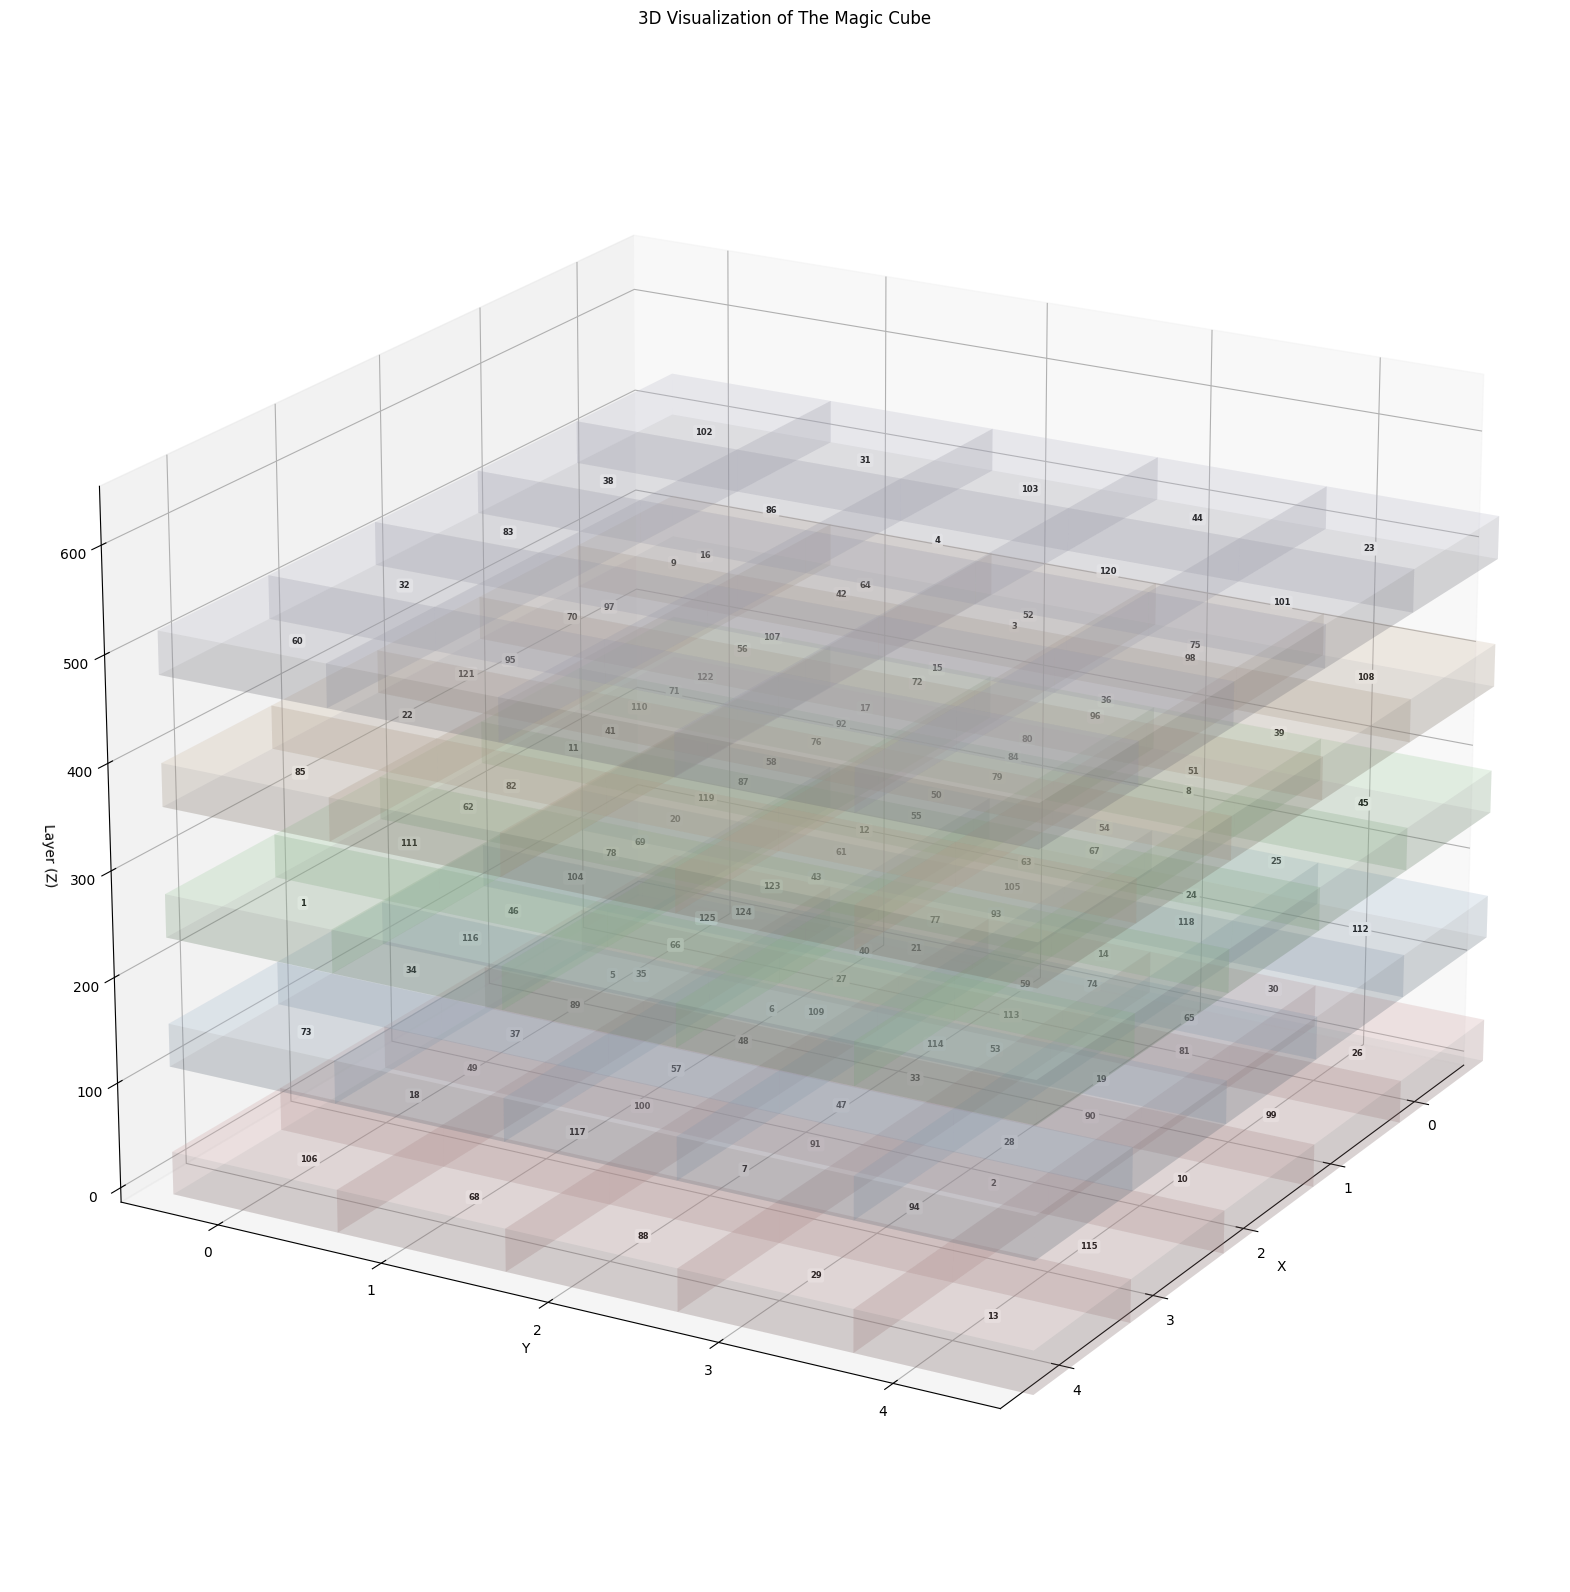

Best Cost: (2831, 64)
Duration: 125.43 seconds


In [15]:
def run_steepest_ascent(n, cube):
    initial_cube = MagicCube(n, cube=cube.cube)
    sahc = SteepestAscent(initial_cube)
    best_solution, best_cost, best_error_count, total_duration = sahc.hill_climb()
    return best_solution, (best_cost, best_error_count), total_duration

best_solution, best_cost, duration = run_steepest_ascent(n, initial_cube)
print("Optimized Cube:")
show_cube(best_solution.cube)
print(f"Best Cost: {best_cost}")
print(f"Duration: {duration:.2f} seconds")

### Run Random Restart

Jumlah iterasi: 500


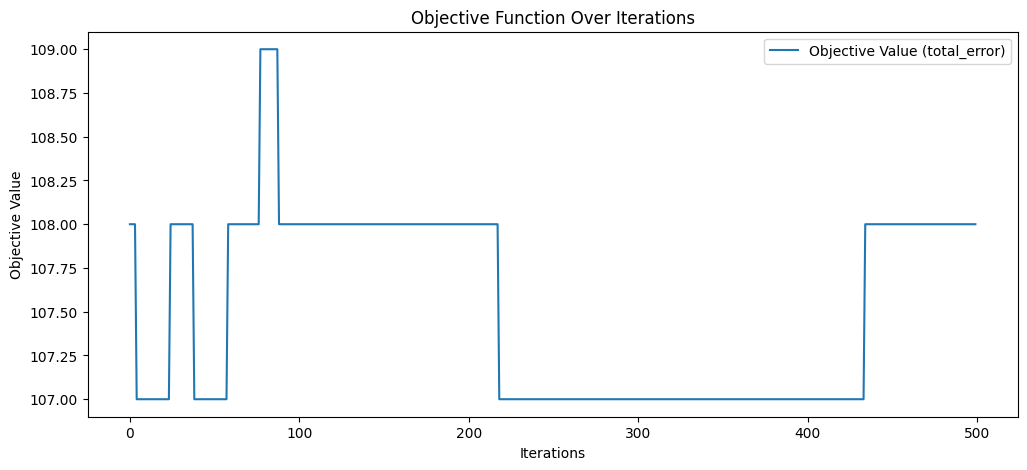

Jumlah iterasi restart 1: 500
Jumlah iterasi: 500


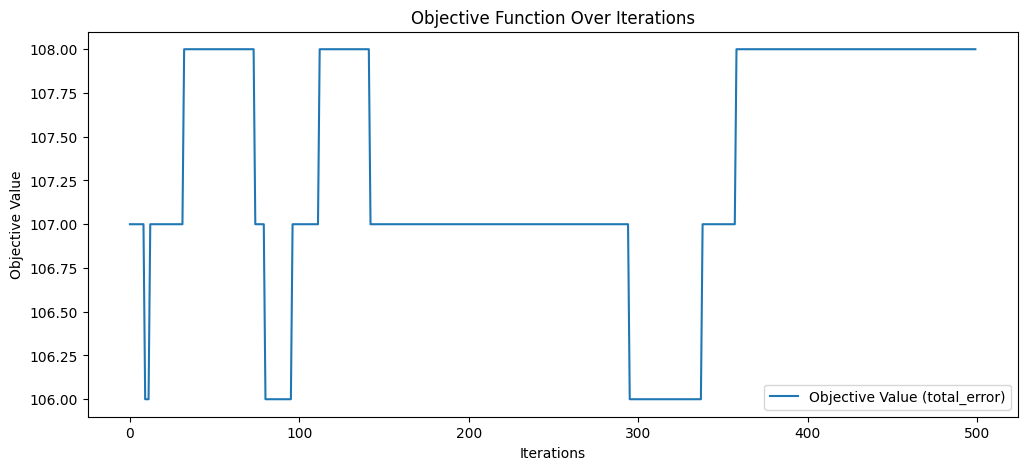

Jumlah iterasi restart 2: 500
Jumlah iterasi: 500


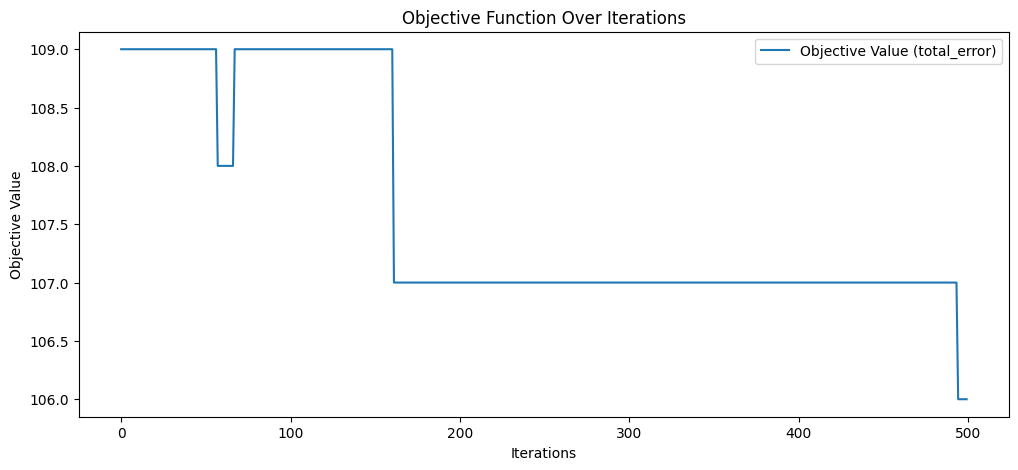

Jumlah iterasi restart 3: 500
Jumlah iterasi: 500


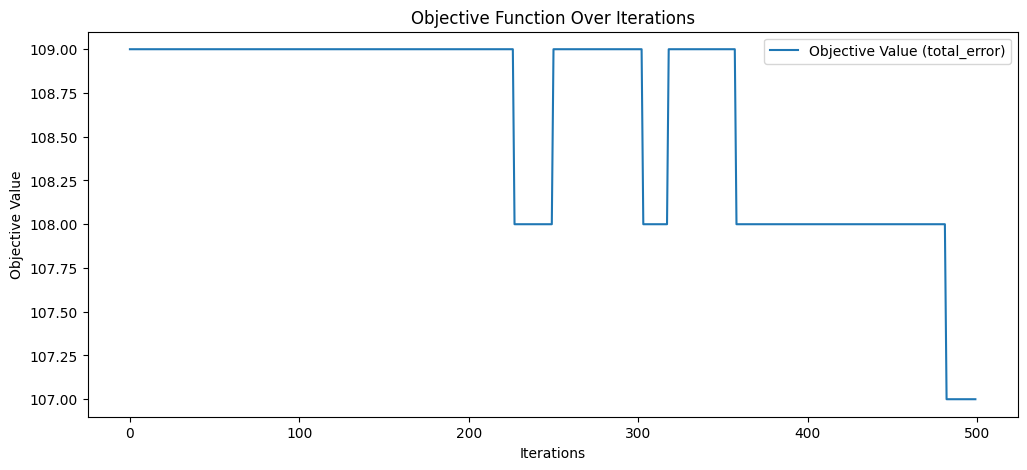

Jumlah iterasi restart 4: 500
Jumlah iterasi: 500


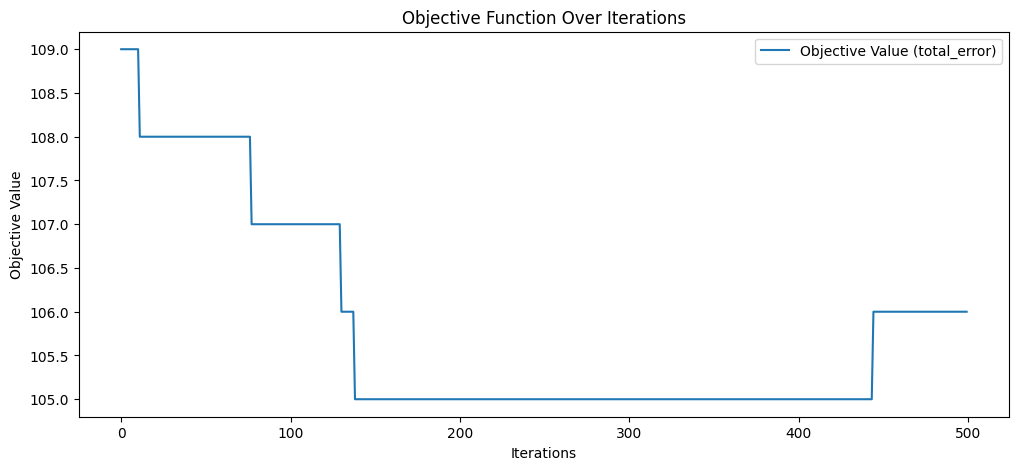

Jumlah iterasi restart 5: 500
Jumlah iterasi: 500


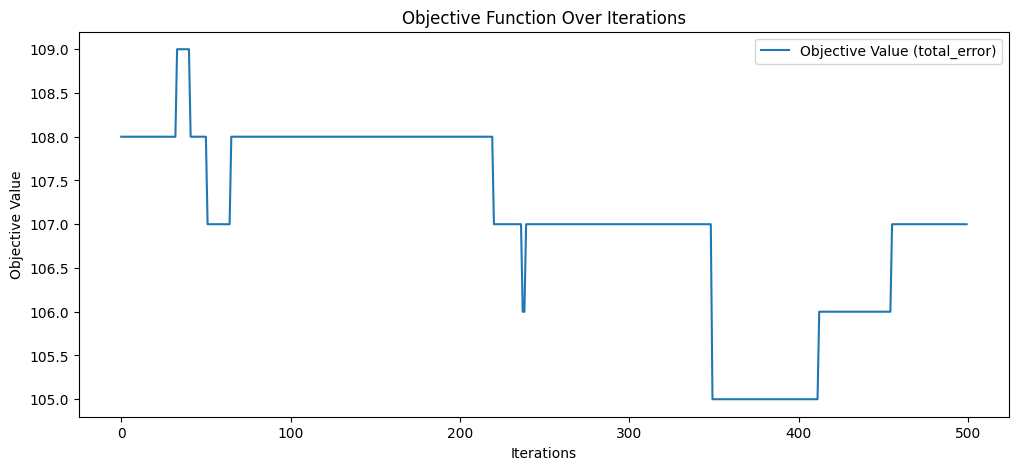

Jumlah iterasi restart 6: 500
Jumlah iterasi: 500


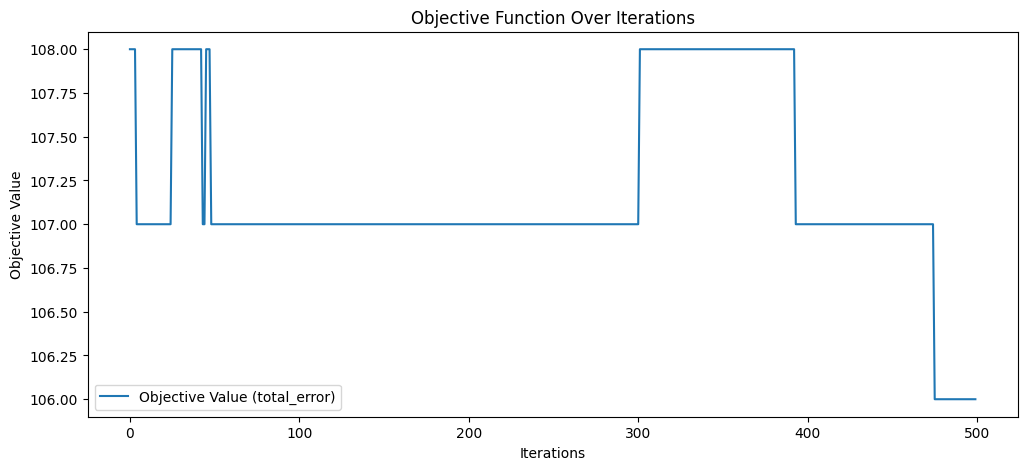

Jumlah iterasi restart 7: 500
Jumlah iterasi: 500


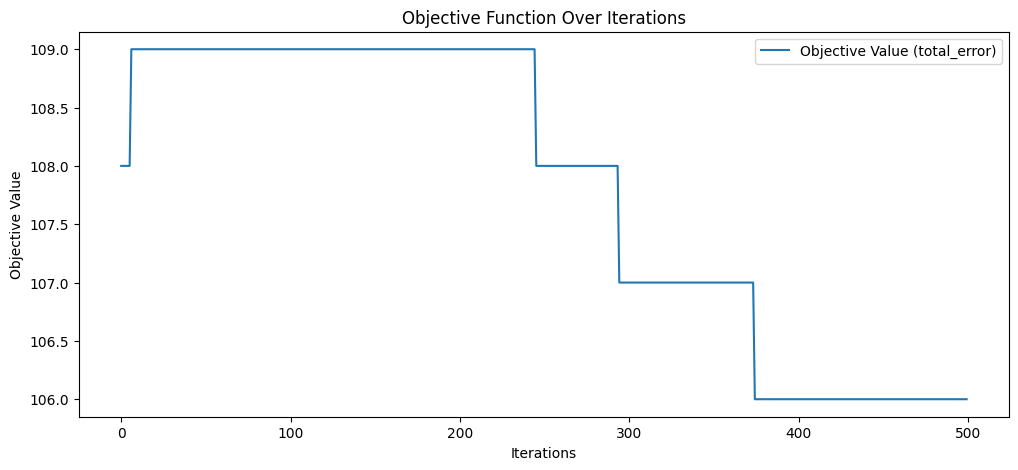

Jumlah iterasi restart 8: 500
Jumlah iterasi: 500


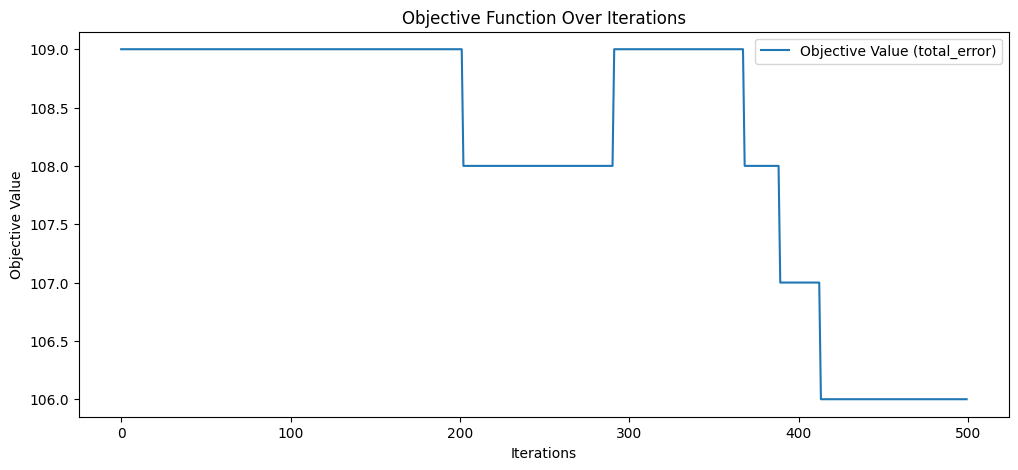

Jumlah iterasi restart 9: 500
Jumlah iterasi: 500


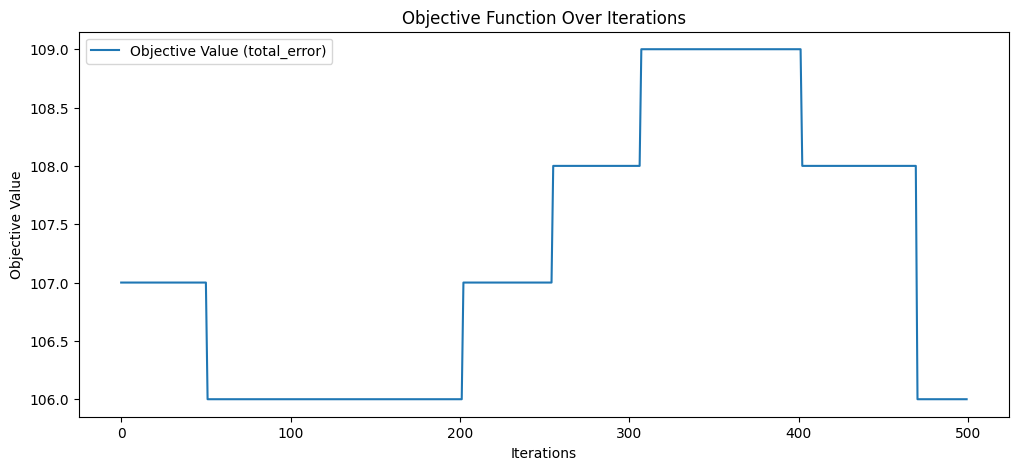

Jumlah iterasi restart 10: 500
Jumlah restart: 10


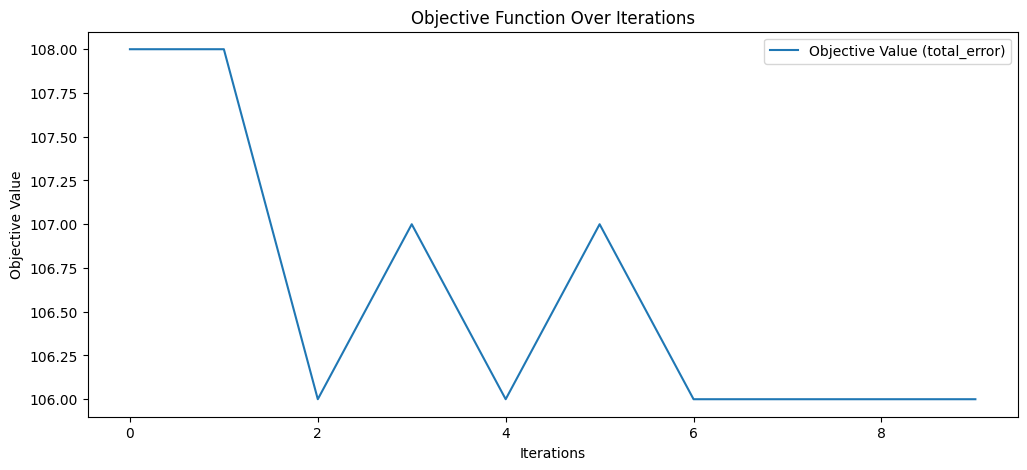

Optimized Cube:


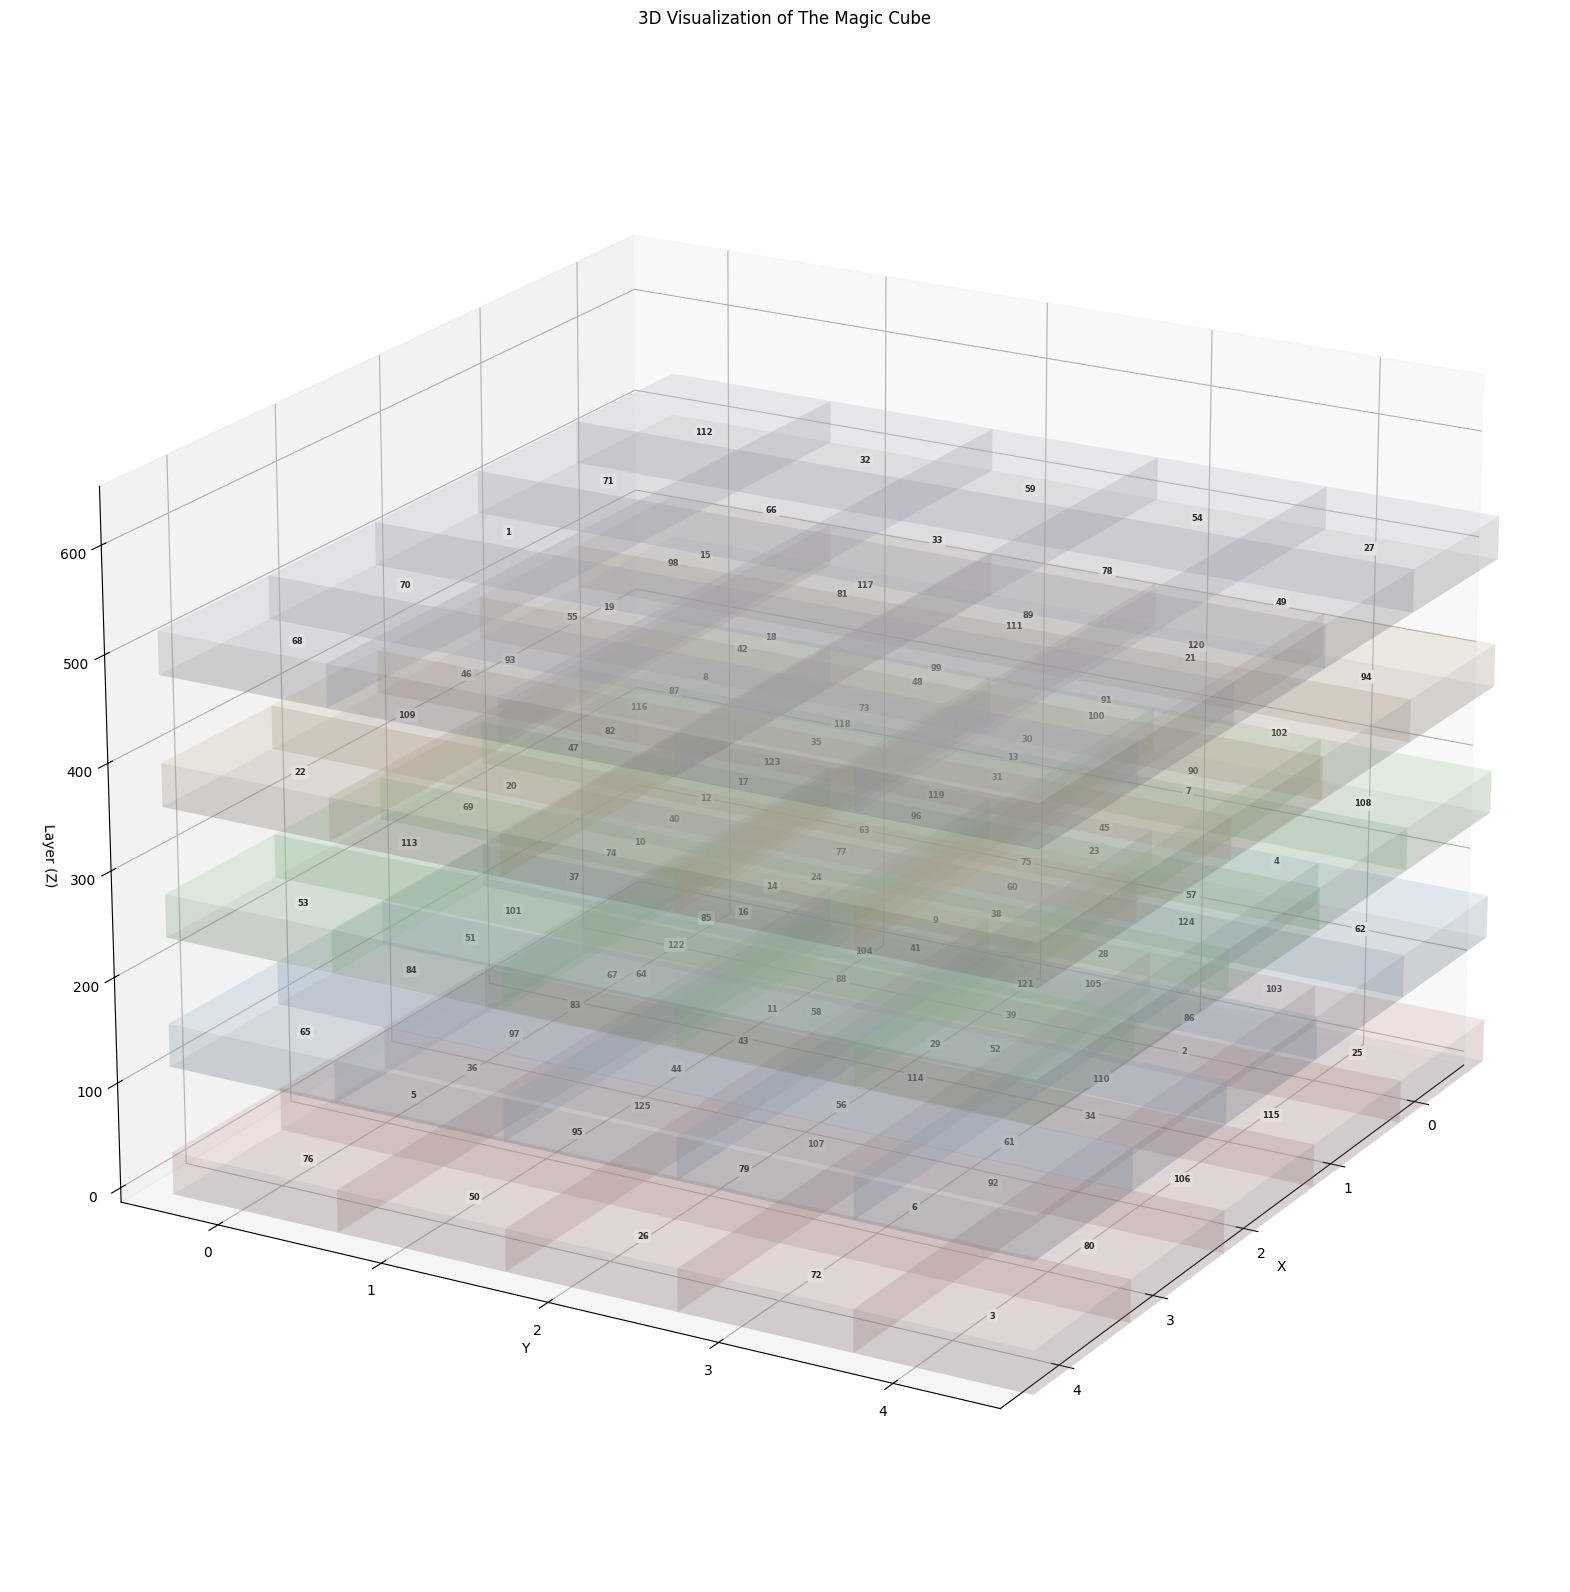

Best Cost: (3045, 106)
Duration: 1.79 seconds


In [16]:
def run_random_restart():
    rrhc = RandomRestart(max_iteration=500)
    best_solution, best_cost, best_error_count, total_duration = rrhc.hill_climb()
    return best_solution, (best_cost, best_error_count), total_duration

best_solution, best_cost, duration = run_random_restart()
print("Optimized Cube:")
show_cube(best_solution.cube)
print(f"Best Cost: {best_cost}")
print(f"Duration: {duration:.2f} seconds")